## The Sparks Foundation

### Task 6: Create the Decision Tree Classifier and visualize it graphically

### Author: Sudhir Panwar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('task6.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Separate the feature var and target var
X = df.iloc[:,1:5]
y = df.iloc[:,5]            #target variable

In [6]:
def mark(s):
    if s == 'Iris-setosa':
        label = 0
    elif s == 'Iris-versicolor':
        label = 1
    else:
        label = 2
    return label

In [7]:
y = y.apply(lambda x: mark(x))

In [8]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [9]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, test_size=0.25)

In [10]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
94,5.6,2.7,4.2,1.3
135,7.7,3.0,6.1,2.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2
29,4.7,3.2,1.6,0.2


In [11]:
# distribution in training set
y_train.value_counts(normalize = True)

0    0.357143
2    0.348214
1    0.294643
Name: Species, dtype: float64

In [12]:
y_valid.value_counts(normalize = True)

1    0.447368
2    0.289474
0    0.263158
Name: Species, dtype: float64

In [13]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [14]:
X_valid.shape, y_valid.shape

((38, 4), (38,))

In [15]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [16]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state=1234, splitter = 'best')

In [17]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1234)

In [18]:
#predictions on validation set
y_pred = dt_model.predict(X_valid)

In [19]:
dt_model.predict_proba(X_valid)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.02702703, 0.97297297],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.02702703, 0.97297297],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02702703, 0.97297297],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02702703, 0.97297297],
       [0.        , 0.02702703, 0.97297297],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.91428571, 0.08571429],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.91428571, 0.08571429],
       [1.        , 0.        , 0.        ],
       [0.

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_valid, y_pred) * 100

94.73684210526315

In [22]:
# Changing the max_depth
train_accuracy = []
validation_accuracy = []
for depth in range(1,11):
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [23]:
frame = pd.DataFrame({'max_depth':range(1,11), 'train_accuracy':train_accuracy, 'valid_accuracy':validation_accuracy})
frame.head()

,max_depth,train_accuracy,valid_accuracy
0,1,0.705357,0.552632
1,2,0.964286,0.947368
2,3,0.964286,0.947368
3,4,1.000000,0.973684
4,5,1.000000,0.973684


No handles with labels found to put in legend.


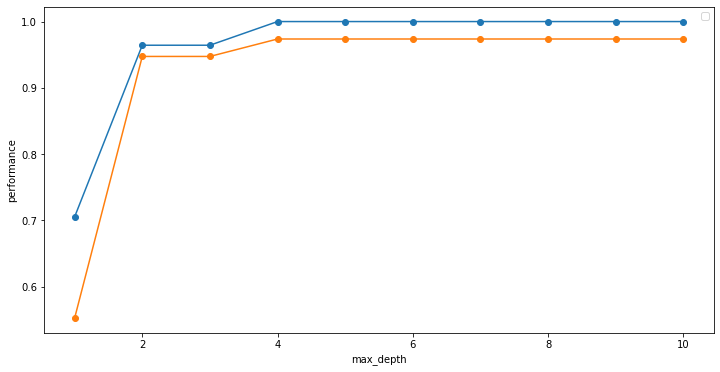

In [25]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_accuracy'], marker='o')
plt.plot(frame['max_depth'], frame['valid_accuracy'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('performance')
plt.legend()

In [26]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=1234, splitter = 'best')

In [27]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1234)

In [33]:
dt_model.score(X_valid, y_valid) * 100

97.36842105263158

In [30]:
from sklearn import tree

In [31]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



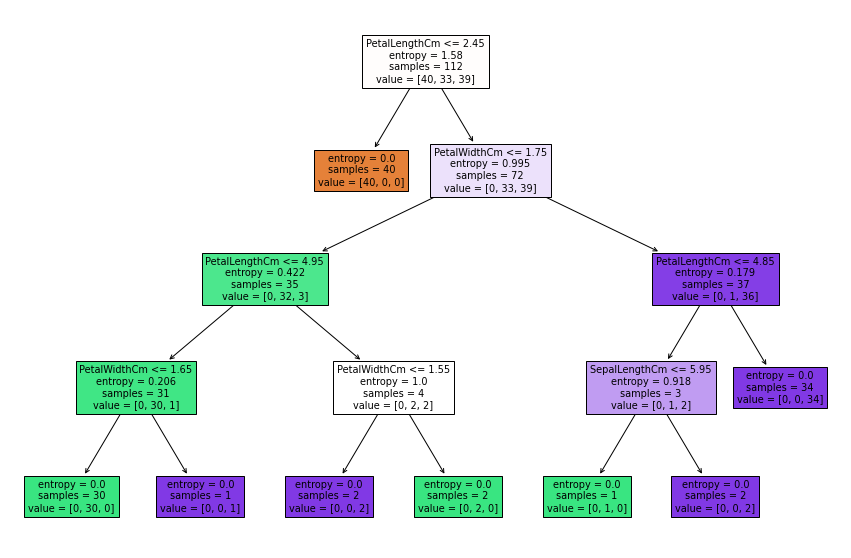

In [32]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_model, 
                   feature_names=X_train.columns,
                   max_depth = 4,
                   filled=True)

### The End !!!